In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Convolutional layer
- Input: order 4 tensor (N, H, W, C)
        N: Number of images
        H: Height of image
        W: Width of image
        C: Number of color channels
- Conv layer tensor: order 4 tensor $(H_f, W_f, C_i, C_o)$    
    + $H_f$ : Height of filter patch
    + $W_f$: Width of filter patch
    + $C_i$: Channels in input (# of color channels)
    + $C_o$: Channels in output (# of filters)
- Example
    + Conv Layer 1
    <img src="./Figs/1.jpg" alt="Drawing" style="width: 550px;"/>
    + Conv Layer 2
    <img src="./Figs/2.jpg" alt="Drawing" style="width: 550px;"/>

### Stride
- Steps of filter moving
    <img src="./Figs/3.jpg" alt="Drawing" style="width: 550px;"/>
    <img src="./Figs/4.jpg" alt="Drawing" style="width: 550px;"/>
    <img src="./Figs/5.jpg" alt="Drawing" style="width: 550px;"/>

### Padding (reserve the img size)
<img src="./Figs/6.jpg" alt="Drawing" style="width: 550px;"/>


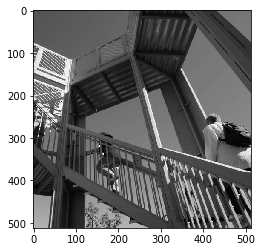

In [2]:
# image input
from scipy import misc

img = misc.ascent()
plt.imshow(img, cmap='gray');

In [3]:
# input tensor reshape
img_tensor = img.reshape((1, 512, 512, 1))

### Predict the filter

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()

# Convo layer
model.add(
    Conv2D(
        1, # Number of nodes
        (3, 3), # Filter size
        strides=(2,1), # strides
        input_shape=(512, 512, 1)))

model.compile('adam', 'mse')

Using TensorFlow backend.


In [5]:
# output tensor
img_pred_tensor = model.predict(img_tensor)
img_pred_tensor.shape

(1, 255, 510, 1)

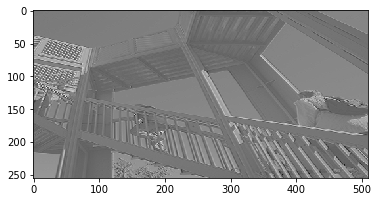

In [6]:
# output image (255 x 510)
img_pred = img_pred_tensor[0, :, :, 0]
plt.imshow(img_pred, cmap='gray');

(3, 3, 1, 1)


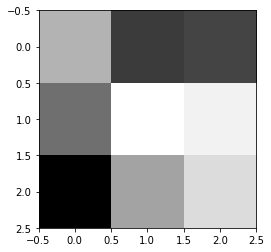

In [7]:
# Check the kernel(filter)
weights = model.get_weights()
print(weights[0].shape)
plt.imshow(weights[0][:,:,0,0], cmap='gray');

### Fit a predefined filter

In [8]:
# All 1: average filter
weights[0] = np.ones(weights[0].shape)
model.set_weights(weights)

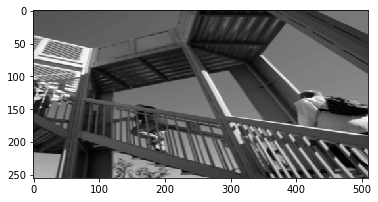

In [9]:
img_pred_tensor = model.predict(img_tensor)
img_pred = img_pred_tensor[0, :, :, 0]
plt.imshow(img_pred, cmap='gray');